In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [93]:
df = pd.read_csv("../Tom/adult.csv", index_col=0)
feature_names = list(df.columns)[:-1]
X = df[feature_names].values
y = df["compensation"].values
df.head()

,age,education,sex,weekly-hours,employment-type_Government,employment-type_Privately-Employed,employment-type_Self-Employed,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,compensation
idx,,,,,,,,,,,,,,,,,,,,,
0,39,1,1,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,1,1,13,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,38,2,1,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,3,1,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,1,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


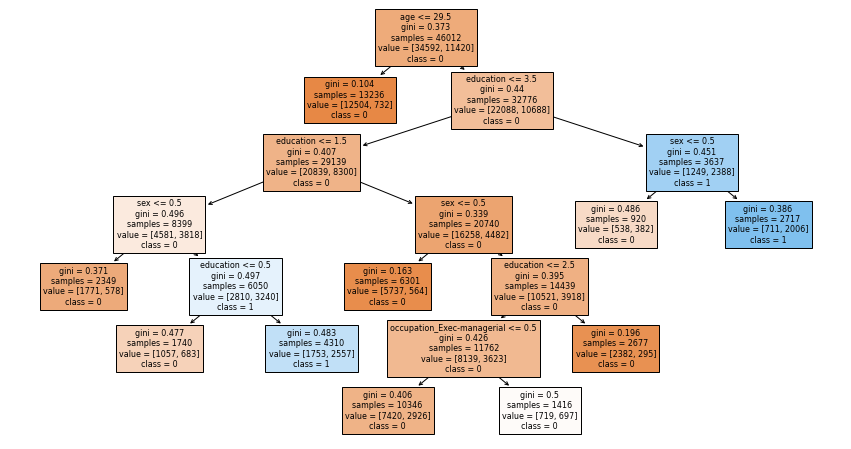

In [218]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X, y)
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(clf, feature_names=feature_names, class_names=['0', '1'], filled=True, ax=ax)
plt.show()

In [115]:
weights = np.zeros((clf.tree_.node_count, 2))
for node in range(clf.tree_.node_count):
    if clf.tree_.feature[node] >= 0:
        print(f'{node}: {feature_names[clf.tree_.feature[node]]} <= {clf.tree_.threshold[node]}')

0: age <= 29.5
2: education <= 3.5
3: education <= 1.5
4: sex <= 0.5
5: sex <= 0.5
6: sex <= 0.5
8: education <= 2.5
10: education <= 0.5
11: occupation_Exec-managerial <= 0.5


In [162]:
# weights range -1 (not possible) to 1 (possible)
# index 0 True -> False
# index 1 False -> True
weights[0] = np.array([0.9, -1])
weights[2] = np.array([0.4, -1])
weights[3] = np.array([0.8, -1])
weights[4] = np.array([-1, -1])
weights[5] = np.array([-1, -1])
weights[6] = np.array([-1, -1])
weights[8] = np.array([0.6, -1])
weights[10] = np.array([1, -1])
weights[11] = np.array([0.5, -0.5])

In [213]:
def get_weight(start, end):
    dp_start = clf.decision_path(start.reshape(1, -1)).toarray().squeeze()
    dp_end = clf.decision_path(end.reshape(1, -1)).toarray().squeeze()
    split_node = np.flatnonzero((dp_start + dp_end) == 2)[-1]
    if start[clf.tree_.feature[split_node]] <= clf.tree_.threshold[split_node]:
        return weights[split_node][0]
    else:
        return weights[split_node][1]

In [214]:
eg1 = X[0]
eg1

array([39,  1,  1, 40,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1])

In [215]:
eg2 = X[5]
eg2

array([37,  4,  0, 40,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1])

In [216]:
get_weight(eg1, eg2)

0.4

In [217]:
get_weight(eg2, eg1)

-1.0